<a href="https://colab.research.google.com/github/waqqasansari/GRIP_DS_BA/blob/main/GRIP_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task-1 Exploratory data analysis on ‘Indian Premier League’ data set.
**First we have find out following points**


1.   The most successful teams
2.   The most successful Player
3.   factors
contributing win or loss of a team.

And Suggest teams or players a company should endorse for its products.




#Import Essential library for this task

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from matplotlib.patches import Patch
from plotnine import *
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#Load Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Indian Premier League/deliveries.csv')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
match = pd.read_csv('/content/drive/MyDrive/Indian Premier League/matches.csv')
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [ ]:
match.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

1). The most sucessfull team would be the team which won the maximum number of mathces. so lets find out.

In [ ]:
#lets explore in the match data frame
team_df = match[['team1','team2', 'toss_winner','toss_decision','winner']]
team_df

,team1,team2,toss_winner,toss_decision,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore
...,...,...,...,...,...
751,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians
752,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Mumbai Indians
753,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,Delhi Capitals
754,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings


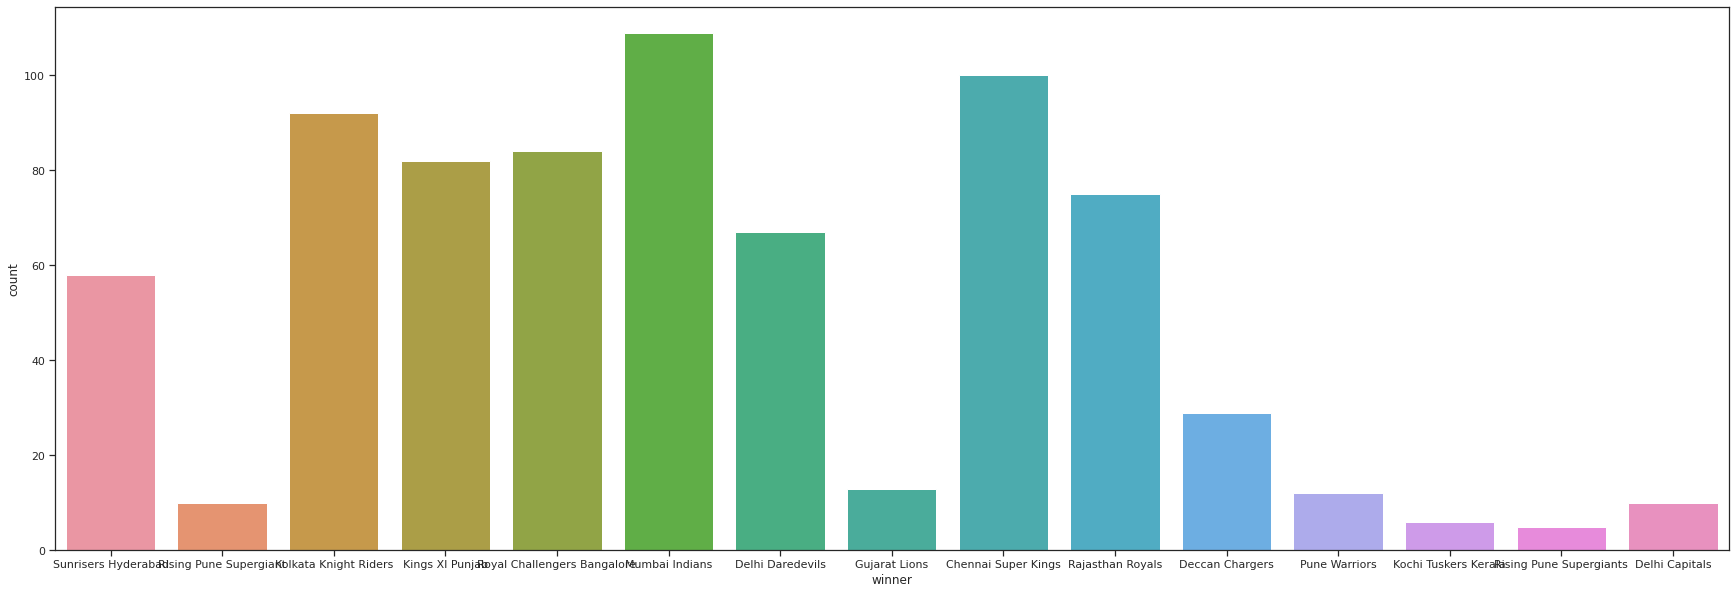

In [ ]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.set_theme(style="darkgrid")
sns.countplot(x="winner", data=team_df)

here we can see Mumbai Indians is the most sucessfull team in the ipl. But Chennai super kings is not far behind

In [ ]:
#lets see the difference between MI and CSK
win_diff = (team_df['winner'].value_counts()[0] - team_df['winner'].value_counts()[1])
win_diff

9

Lets plot winning percentage of the teams

In [ ]:
teams = match.team1.unique()
win_percent = []
for each_team in teams:
    team_vs = np.count_nonzero(match['team1'].astype(str).str.contains(each_team)) + np.count_nonzero(match['team2'].astype(str).str.contains(each_team))
    team_won = np.count_nonzero(match['winner'].astype(str).str.contains(each_team))   
    win_percent.append(100 * (team_won / team_vs))

In [ ]:
won_df = pd.DataFrame({'Team': teams, 'Win Percantge': win_percent})
print(won_df)

                           Team  Win Percantge
0           Sunrisers Hyderabad      53.703704
1                Mumbai Indians      58.288770
2                 Gujarat Lions      43.333333
3        Rising Pune Supergiant      50.000000
4   Royal Challengers Bangalore      46.666667
5         Kolkata Knight Riders      51.685393
6              Delhi Daredevils      41.614907
7               Kings XI Punjab      46.590909
8           Chennai Super Kings      60.975610
9              Rajasthan Royals      51.020408
10              Deccan Chargers      38.666667
11         Kochi Tuskers Kerala      42.857143
12                Pune Warriors      26.086957
13      Rising Pune Supergiants      35.714286
14               Delhi Capitals      62.500000


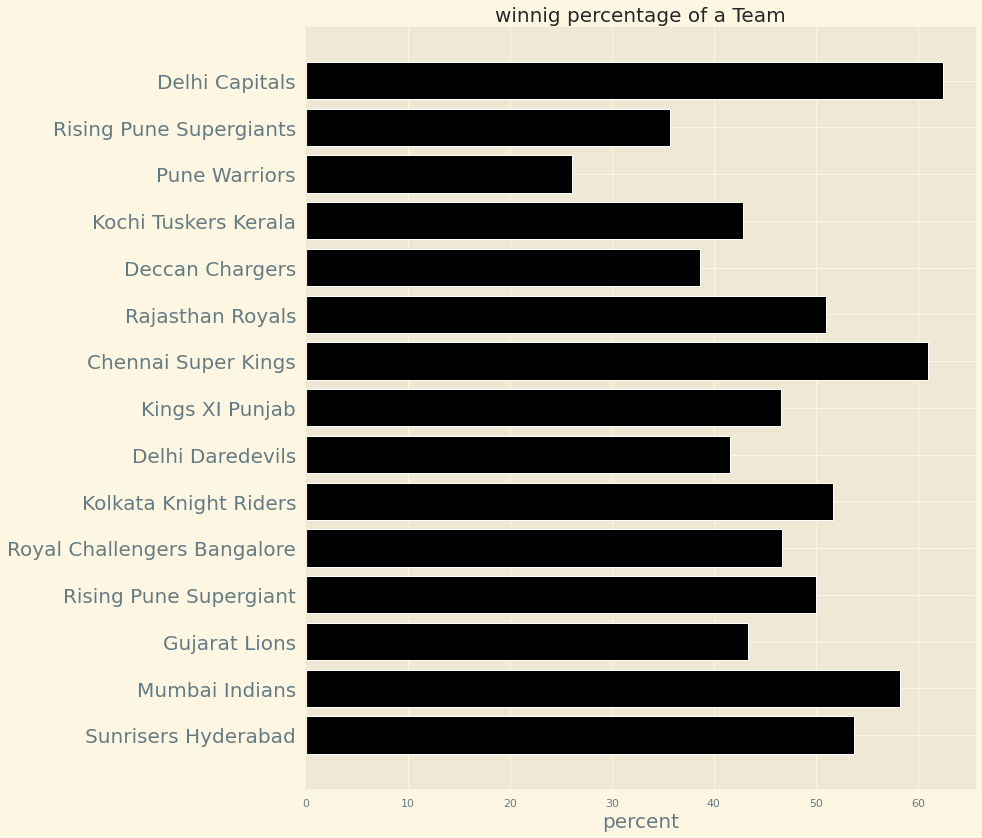

In [ ]:
ind = np.arange(won_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,14))
rects = ax.barh(ind, win_percent, color='black', align='center')
ax.set_yticks(ind)
ax.set_yticklabels(won_df.Team.values, rotation='horizontal', fontsize=20)
ax.set_xlabel("percent", fontsize=20)
ax.set_title("winnig percentage of a Team", fontsize=20)
plt.show()

Delhi capitals have highest win percentage. it is because its a new team. In older teams CSK have the highest percentage win then Mumbai Indians

Mumbai Indians is ahead of CSK by 9 matches

Lets see the role of toss in the winnig mathces

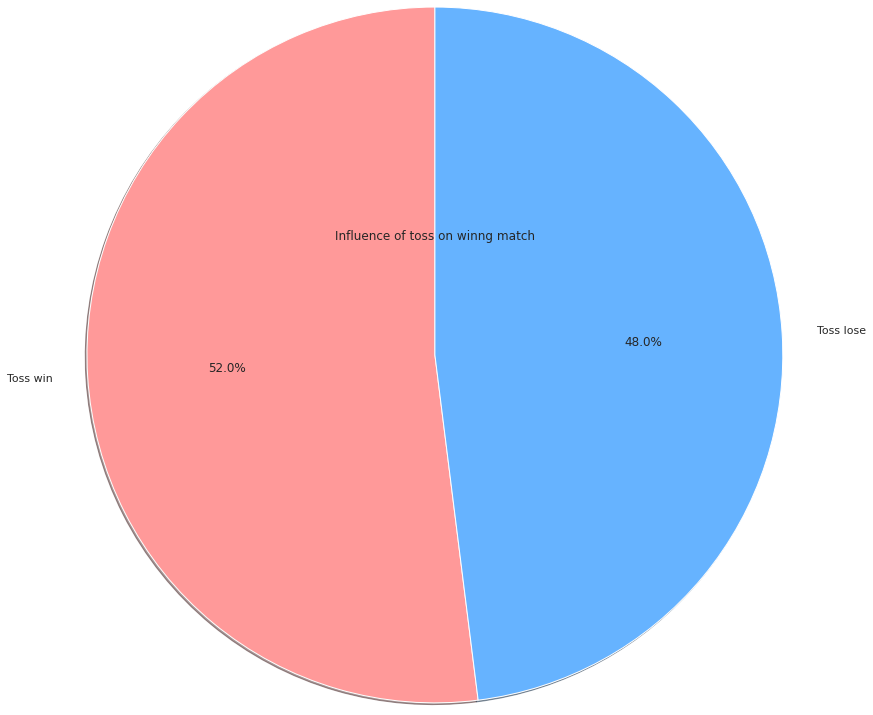

In [ ]:
df_toss = match[['toss_winner', 'winner']]
toss_win = df_toss[df_toss.toss_winner == df_toss.winner].count()[0]
toss_lose = df_toss[df_toss.toss_winner != df_toss.winner].count()[0]
y = [toss_win, toss_lose]
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(y, labels = ["Toss win", "Toss lose"], autopct = '%1.1f%%', radius=4, colors=colors, shadow = True, startangle=90)
plt.title("Influence of toss on winng match")
plt.show()

Well winning toss does not ensures that the team is gonna win

lets analyse the toss decision

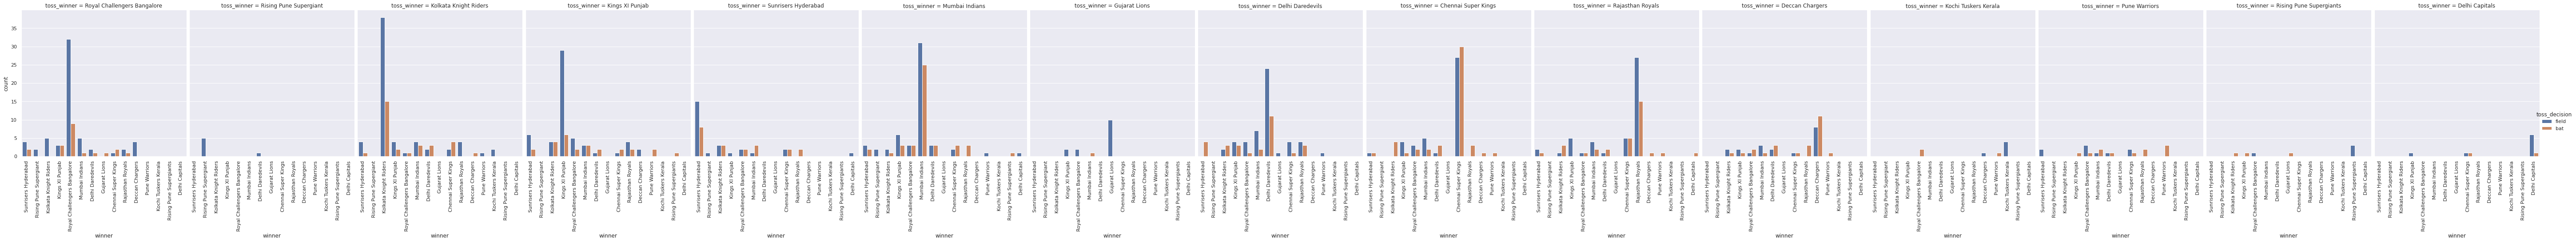

In [ ]:
g = sns.catplot(x="winner", hue="toss_decision",col="toss_winner",
                data=team_df, kind="count",
                height=10, aspect=2)
g.set_xticklabels(rotation=90)
g.fig.set_figwidth(80)
g.fig.set_figheight(5)

You'll see the team which field first have higher probabaility to win.

To find most sucessfull batsman, we have to find how many times a batsman got awarded man of the match

In [ ]:
mom_df = match[['team1',	'team2'	,'toss_winner',	'toss_decision', 'winner',	'win_by_runs',	'win_by_wickets',	'player_of_match']]
mom_df

,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,player_of_match
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,0,7,SPD Smith
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,10,CA Lynn
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,0,6,GJ Maxwell
4,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,15,0,KM Jadhav
...,...,...,...,...,...,...,...,...
751,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,0,9,HH Pandya
752,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,Mumbai Indians,0,6,AS Yadav
753,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,Delhi Capitals,0,2,RR Pant
754,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,0,6,F du Plessis


Plot Batsman name that have player of the match award more than 8 times

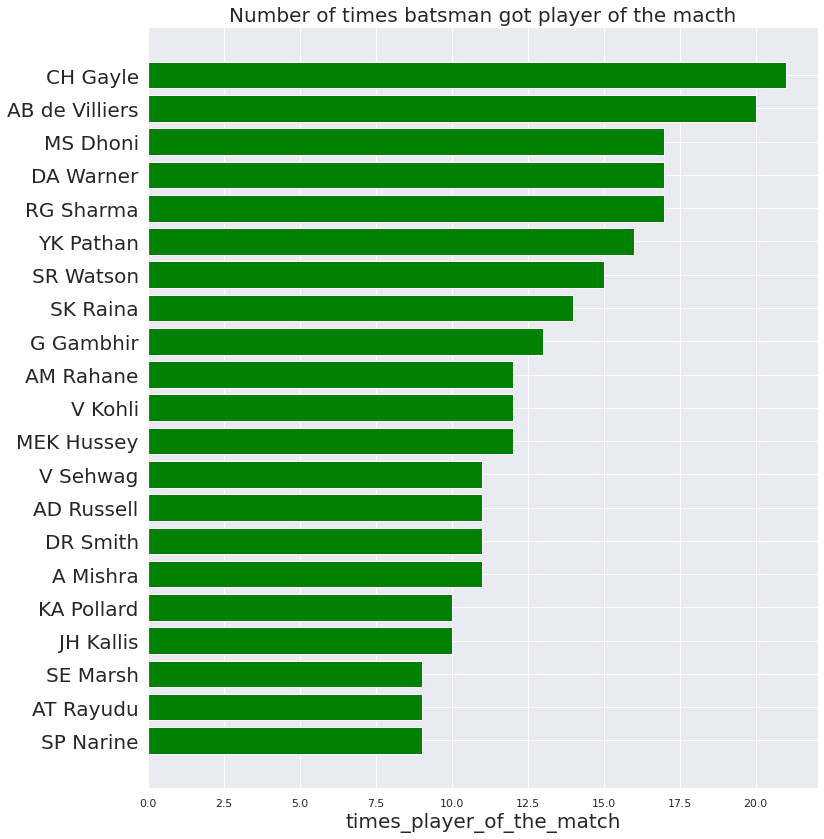

In [ ]:
top_bat = match['player_of_match'].value_counts().reset_index()
top_bat.columns = ['player_name', 'times_player_of_the_match']
top_bat = top_bat.loc[top_bat['times_player_of_the_match']>8]
top_bat = top_bat.sort_values(by='times_player_of_the_match')

ind = np.arange(top_bat.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(12,14))
rects = ax.barh(ind, top_bat.times_player_of_the_match.values, color='green')
ax.set_yticks(ind)
ax.set_yticklabels(top_bat.player_name.values, rotation='horizontal', fontsize=20)
ax.set_xlabel("times_player_of_the_match", fontsize=20)
ax.set_title("Number of times batsman got player of the macth", fontsize=20)
plt.show()

Here are top 7 most sucessfull player of the ipl.


1.   CH Gayle
1.   Ab Devilliers
2.   MS Dhoni
1.   RG Sharma
1.   YK Pathan 
1.   SR Watson
2.   SK Raina 

**Above top players a company should endorse for its products.**